# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
# from api_keys import api_key
api_key = 
# Incorporated citipy to determine city based on latitude and longitude
# !pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


625

In [3]:
cities_df= pd.DataFrame()
cities_df["cities"] = cities
cities_df["temperature"] = ""
cities_df["humidity"] = ""
cities_df["cloudiness"] = ""
cities_df["wind speed"] = ""
cities_df["latitude"] = ""


cities_df.head()

,cities,temperature,humidity,cloudiness,wind speed,latitude
0,atuona,,,,,
1,yanzhou,,,,,
2,bambous virieux,,,,,
3,dzhusaly,,,,,
4,coahuayana,,,,,


In [4]:
units = "metric"
url = "http://api.openweathermap.org/data/2.5/weather?"
set_index = 1

cities= []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
latitude = []

for index, row in cities_df.iterrows():
    city = row['cities']
    
    i = (index // 50)
    if i >= 1:
        set_index = i + 1
    
    try:
        query_url = f"{url}appid={api_key}&q={city}&units={units}"
        response = requests.get(query_url).json()
        print(f"Processing Record {index} of set index {set_index} | {city}.")
        cities.append(response['name'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        latitude.append(response['coord']['lat'])
        wind_speed.append(response['wind']['speed'])
        
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")

Processing Record 0 of set index 1 | atuona.
Processing Record 1 of set index 1 | yanzhou.
Processing Record 2 of set index 1 | bambous virieux.
Processing Record 3 of set index 1 | dzhusaly.
City not found. Skipping...
Processing Record 4 of set index 1 | coahuayana.
Processing Record 5 of set index 1 | jamestown.
Processing Record 6 of set index 1 | albany.
Processing Record 7 of set index 1 | new norfolk.
Processing Record 8 of set index 1 | qaanaaq.
Processing Record 9 of set index 1 | rikitea.
Processing Record 10 of set index 1 | east london.
Processing Record 11 of set index 1 | hithadhoo.
Processing Record 12 of set index 1 | ponta do sol.
Processing Record 13 of set index 1 | conceicao do araguaia.
Processing Record 14 of set index 1 | yining.
Processing Record 15 of set index 1 | kapaa.
Processing Record 16 of set index 1 | hilo.
Processing Record 17 of set index 1 | sept-iles.
Processing Record 18 of set index 1 | leningradskiy.
Processing Record 19 of set index 1 | moree.
P

Processing Record 159 of set index 4 | jacqueville.
Processing Record 160 of set index 4 | makakilo city.
Processing Record 161 of set index 4 | hobart.
Processing Record 162 of set index 4 | kintinku.
Processing Record 163 of set index 4 | aklavik.
Processing Record 164 of set index 4 | lolua.
City not found. Skipping...
Processing Record 165 of set index 4 | broken hill.
Processing Record 166 of set index 4 | san jeronimo.
Processing Record 167 of set index 4 | iqaluit.
Processing Record 168 of set index 4 | busselton.
Processing Record 169 of set index 4 | vardo.
Processing Record 170 of set index 4 | yunjinghong.
City not found. Skipping...
Processing Record 171 of set index 4 | sitka.
Processing Record 172 of set index 4 | khatanga.
Processing Record 173 of set index 4 | marsh harbour.
Processing Record 174 of set index 4 | ambon.
Processing Record 175 of set index 4 | manoel urbano.
Processing Record 176 of set index 4 | pinheiro machado.
Processing Record 177 of set index 4 | so

Processing Record 314 of set index 7 | galesong.
Processing Record 315 of set index 7 | hamilton.
Processing Record 316 of set index 7 | tuensang.
Processing Record 317 of set index 7 | la ronge.
Processing Record 318 of set index 7 | tubuala.
Processing Record 319 of set index 7 | saint-joseph.
Processing Record 320 of set index 7 | kazalinsk.
City not found. Skipping...
Processing Record 321 of set index 7 | kieta.
Processing Record 322 of set index 7 | borujerd.
Processing Record 323 of set index 7 | buchanan.
Processing Record 324 of set index 7 | laon.
Processing Record 325 of set index 7 | sambava.
Processing Record 326 of set index 7 | tautira.
Processing Record 327 of set index 7 | qarqin.
Processing Record 328 of set index 7 | dingle.
Processing Record 329 of set index 7 | loa janan.
Processing Record 330 of set index 7 | klyuchi.
Processing Record 331 of set index 7 | cacoal.
Processing Record 332 of set index 7 | shangrao.
Processing Record 333 of set index 7 | carmen.
Proce

Processing Record 471 of set index 10 | aykhal.
Processing Record 472 of set index 10 | pimenta bueno.
Processing Record 473 of set index 10 | smithers.
Processing Record 474 of set index 10 | camacha.
Processing Record 475 of set index 10 | axel.
Processing Record 476 of set index 10 | raudeberg.
Processing Record 477 of set index 10 | batangafo.
Processing Record 478 of set index 10 | puerto colombia.
Processing Record 479 of set index 10 | nara.
Processing Record 480 of set index 10 | marrakesh.
Processing Record 481 of set index 10 | zhigansk.
Processing Record 482 of set index 10 | nova vicosa.
Processing Record 483 of set index 10 | nerchinskiy zavod.
Processing Record 484 of set index 10 | osakarovka.
Processing Record 485 of set index 10 | kangaatsiaq.
Processing Record 486 of set index 10 | yozgat.
Processing Record 487 of set index 10 | cumberland.
Processing Record 488 of set index 10 | perg.
Processing Record 489 of set index 10 | katherine.
Processing Record 490 of set ind

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

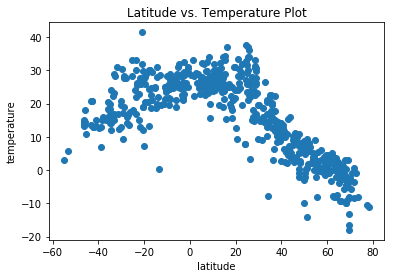

In [5]:
plt.scatter(latitude, temperature ,marker='o')
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("latitude")
plt.ylabel("temperature")
plt.savefig("lat_vs_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

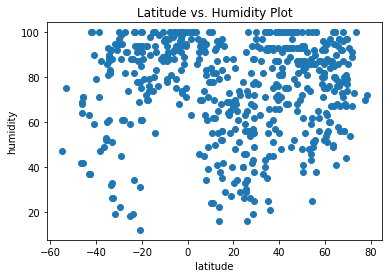

In [6]:
plt.scatter(latitude, humidity ,marker='o')
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("latitude")
plt.ylabel("humidity")
plt.savefig("lat_vs_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

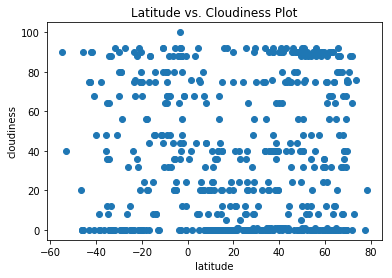

In [7]:
plt.scatter(latitude, cloudiness, marker='o')
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("latitude")
plt.ylabel("cloudiness")
plt.savefig("lat_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

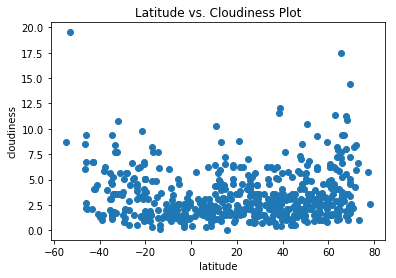

In [8]:
plt.scatter(latitude, wind_speed, marker='o')
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("latitude")
plt.ylabel("cloudiness")
plt.savefig("lat_vs_cloudiness.png")
plt.show()